# Application 3: Iris Flower Species Identification 

In [1]:
from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load iris dataset
features = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']
target = ['Class']
columns = [*features, *target]
data = pd.read_csv('iris.csv', header=None, names=columns)
data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# look for NaN values in each column
data.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Class                0
dtype: int64

In [4]:
data['Class'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [5]:
# PREPROCESSING
data['Class'] = data.Class.map({'Iris-versicolor' : 1, 'Iris-virginica' : 2, 'Iris-setosa': 3})

In [6]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
# Normalize features
X = min_max_scaler.fit_transform(X)
SIZE_TEST = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = SIZE_TEST)

In [8]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
sv_classifier = SVC()
classifiers.append(sv_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
rf_classifier = RandomForestClassifier()
classifiers.append(rf_classifier)
xgb_classifier = XGBClassifier(eval_metric='logloss')
classifiers.append(xgb_classifier)

In [9]:
for classifier in classifiers:
    print(type(classifier))
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
    print("Precision:", metrics.precision_score(Y_test, y_pred, average='macro'))
    print("Recall:", metrics.recall_score(Y_test, y_pred, average='macro'))
    print("----")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.9333333333333333
Precision: 0.9473684210526315
Recall: 0.9285714285714285
----
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy: 0.9777777777777777
Precision: 0.9803921568627452
Recall: 0.9761904761904763
----
<class 'sklearn.svm._classes.SVC'>
Accuracy: 0.9777777777777777
Precision: 0.9803921568627452
Recall: 0.9761904761904763
----
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
----
<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.9777777777777777
Precision: 0.9803921568627452
Recall: 0.9761904761904763
----
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.9777777777777777
Precision: 0.9803921568627452
Recall: 0.9761904761904763
----
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.9777777777777777
Precision: 0.9803921568627452
Recall: 0.9761904761904763
----
<class 'xgboost.sklearn.XGB

## Decision Tree

In [10]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
dt_classifier.feature_importances_

array([0.0190528, 0.       , 0.5598736, 0.4210736])

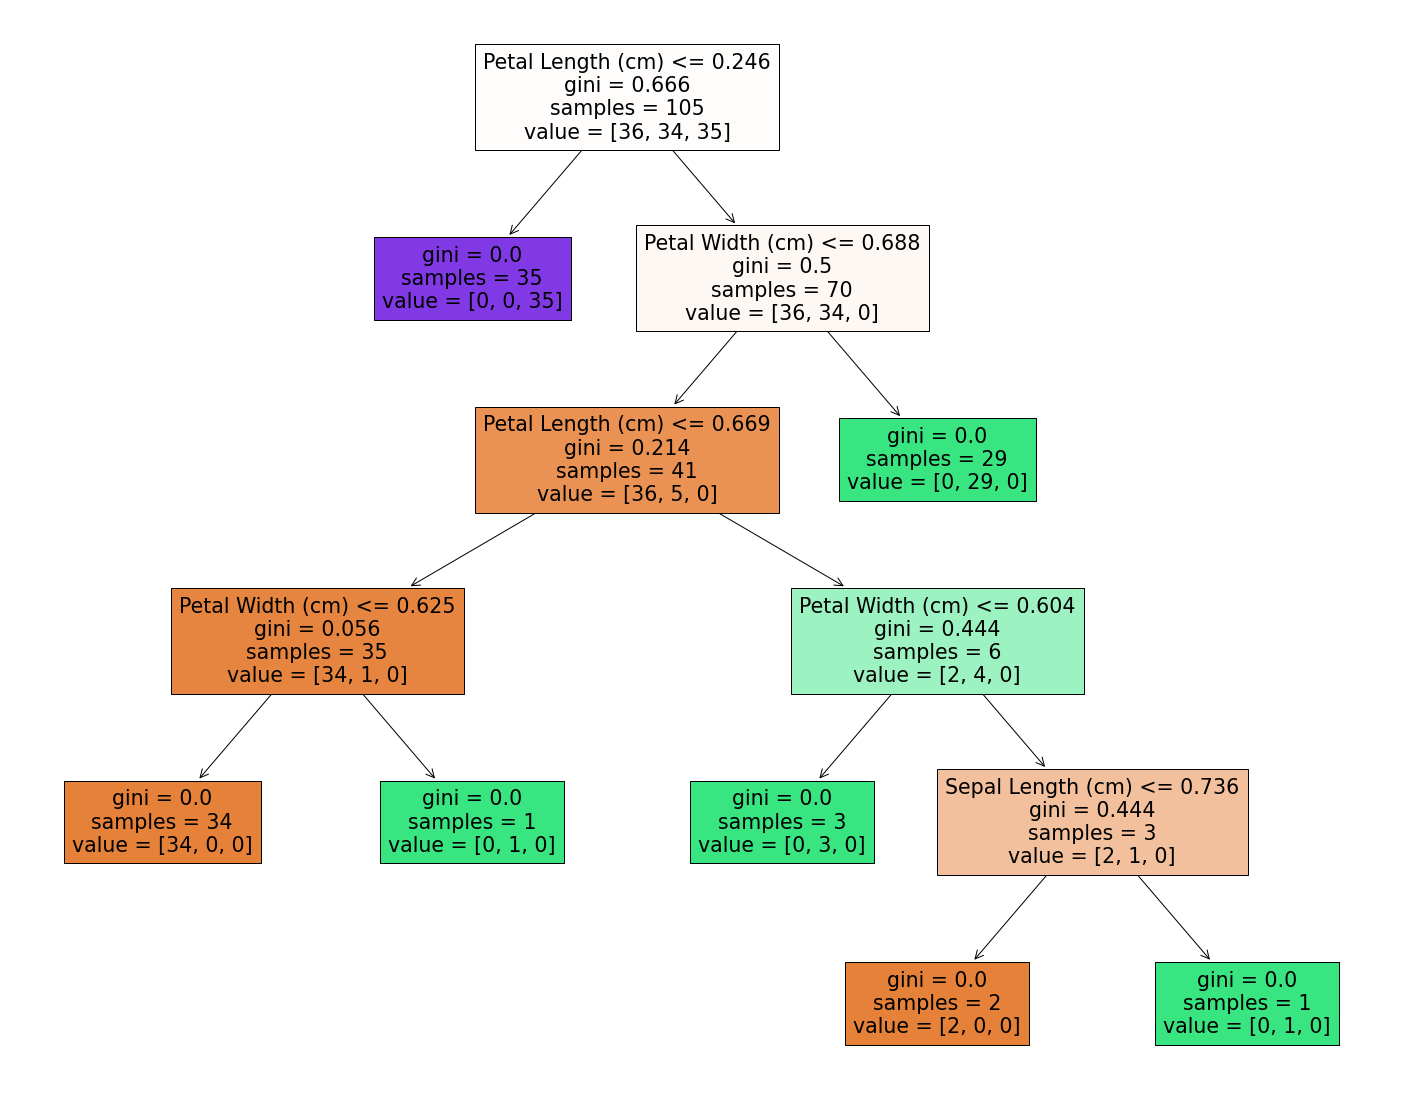

In [12]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_classifier, 
              feature_names = data.columns[0:-1],
              filled=True)
plt.show()

In [13]:
fig.savefig("decision_tree.png")